<h1><center>DATA 602 FINAL PROJECT</center></h1>  
<h2><center>Josh Iden</center></h2>  

# INCOME VS. COVID RATES 

### ABSTRACT

This analysis asks the question: does relationship between Covid rates in the US (cases, hospitalizations, and death) and income by state meet the conditions for simple linear regression, using three data sets obtained from the CDC and US Dept. of Treasury, with the null hypothesis that the relationship between rates and income by state doesn't satisfy these conditions, and the alternative hypothesis that that it does. The relationship between covid rates and income has relevance across industries, as understanding how to model Covid susceptibility is important for future risk assessment and public health contingency planning.

# THE DATA

### THE DATA

- IRS Data by Zip Code - 2019 (source: [US Dept of Treasury]('https://catalog.data.gov/dataset/zip-code-data'))
- Provisional COVID-19 Death Counts in the United States by County (source: [CDC]('https://data.cdc.gov/NCHS/Provisional-COVID-19-Death-Counts-in-the-United-St/kn79-hsxy'))
- United States COVID-19 Community Levels by County (source: [CDC]('https://data.cdc.gov/Public-Health-Surveillance/United-States-COVID-19-Community-Levels-by-County/3nnm-4jni'))

### THE DATA  

Three datasets were acquired for this analysis. 

- 2019 IRS Tax Data from the US Department of Treasury  
- Provisional Covid-19 Death Counts in the US by County from the CDC
- Community Covid-19 levels by County from the CDC

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

### PACKAGES  

* Pandas  
* NumPy  
* Matplotlib  
* Seaborn 
* Statsmodels  

We'll be using the pypthon packages pandas for dataframes, numpy for mathematical functions, matplotlib and seaborn for visualization, and statsmodels for statistical analysis.

First we read in the CDC provisional data.

### CDC PROVISIONAL DATA

In [2]:
# load the provisional county data
pro_file = 'https://raw.githubusercontent.com/josh1den/DATA-602/main/FINAL_PROJECT/SOURCE/Provisional_COVID-19_Death_Counts_in_the_United_States_by_County.csv'
pro_df = pd.read_csv(pro_file)
pro_df.head()

,Date as of,Start Date,End Date,State,County name,FIPS County Code,Urban Rural Code,Deaths involving COVID-19,Deaths from All Causes,Footnote
0,10/19/2022,01/01/2020,10/15/2022,AK,Aleutians East Borough,2013,Noncore,NaN,22.0,One or more data cells have counts between 1-9...
1,10/19/2022,01/01/2020,10/15/2022,AK,Anchorage Municipality,2020,Medium metro,734.0,7081.0,NaN
2,10/19/2022,01/01/2020,10/15/2022,AK,Bethel Census Area,2050,Noncore,39.0,317.0,NaN
3,10/19/2022,01/01/2020,10/15/2022,AK,Denali Borough,2068,Noncore,NaN,24.0,One or more data cells have counts between 1-9...
4,10/19/2022,01/01/2020,10/15/2022,AK,Dillingham Census Area,2070,Noncore,NaN,96.0,One or more data cells have counts between 1-9...


In [3]:
# view info
pro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3085 entries, 0 to 3084
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date as of                 3085 non-null   object 
 1   Start Date                 3085 non-null   object 
 2   End Date                   3085 non-null   object 
 3   State                      3085 non-null   object 
 4   County name                3085 non-null   object 
 5   FIPS County Code           3085 non-null   int64  
 6   Urban Rural Code           3085 non-null   object 
 7   Deaths involving COVID-19  2706 non-null   float64
 8   Deaths from All Causes     3084 non-null   float64
 9   Footnote                   379 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 241.1+ KB


The dataframe consists of 3085 rows and 9 columns, with null values in the Death involving "COVID-19" and "Footnote" columns, and contains county level information about deaths.

In [4]:
# subset and aggregate the data by state, county, and total deaths
death_cols = ('State','Deaths involving COVID-19','County name')
deaths = pro_df.loc[:, death_cols]
deaths.rename({'State':'state','Deaths involving COVID-19':'total_deaths','County name':'county'}, axis=1, inplace=True)
deaths_by_sc = deaths.groupby(['state','county'])['total_deaths'].sum().sort_values(ascending=False).reset_index()
deaths_by_sc.head()

,state,county,total_deaths
0,CA,Los Angeles County,31094.0
1,AZ,Maricopa County,17970.0
2,IL,Cook County,15478.0
3,TX,Harris County,13207.0
4,NY,Kings County,10733.0


We subset the provisional data to State, Deathvs involving Covid-19, and County name. Since we're aggregating total deaths, the null values in deaths can be ignored. We'll also strip the word "County" from the county names. 

In [5]:
# strip the word "county" from the county column
deaths_by_sc['county'] = deaths_by_sc['county'].str.replace(' County', '')
deaths_by_sc.head()

,state,county,total_deaths
0,CA,Los Angeles,31094.0
1,AZ,Maricopa,17970.0
2,IL,Cook,15478.0
3,TX,Harris,13207.0
4,NY,Kings,10733.0


Now we can plot the data to see total deaths by state. 

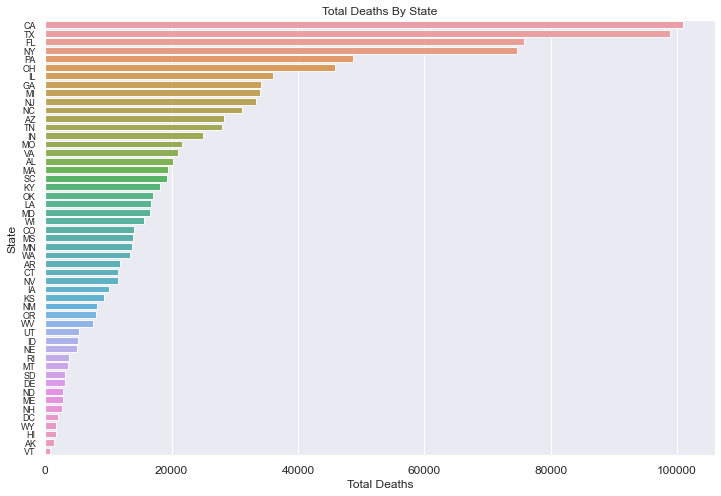

In [6]:
# plot total deaths by state
%matplotlib inline

# aggregate by state
by_state = deaths_by_sc.groupby('state')['total_deaths'].sum().sort_values(ascending=False)

# plot the data
plt.figure(figsize=(12,8))
sns.set(style='darkgrid')
sns.barplot(x=by_state.values, y=by_state.index, alpha=0.9)
plt.title('Total Deaths By State')
plt.xlabel('Total Deaths', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=9)
plt.show();

In [7]:
# write to file
filepath = "/Users/joshiden/Documents/Classes/CUNY SPS/Fall 2022/DATA 602/DATA-602/FINAL_PROJECT/pro_data_cleaned.csv"
deaths_by_sc.to_csv(filepath, index=False)

Lastly, we write the subset data to file which we'll store at the project GitHub repository for easy access.

### IRS DATA

Next we'll read in the IRS data.

In [8]:
# read in iris: data.csv
irs_file = '/Users/joshiden/Documents/Classes/CUNY SPS/Fall 2022/DATA 602/DATA-602/FINAL_PROJECT/data.csv'
irs_df = pd.read_csv(irs_file)
irs_df.head()

,Unnamed: 0,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,ELF,...,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
0,0,1,AL,0,1,778210.0,491030.0,84770.0,189600.0,712890.0,...,0.0,0.0,62720.0,51936.0,671860.0,1700965.0,669570.0,1694792.0,1980.0,3512.0
1,1,1,AL,0,2,525940.0,247140.0,123910.0,139860.0,481760.0,...,0.0,0.0,85860.0,122569.0,438020.0,1274802.0,435210.0,1266557.0,3670.0,7410.0
2,2,1,AL,0,3,285700.0,105140.0,128140.0,44560.0,260570.0,...,0.0,0.0,73980.0,154932.0,212040.0,575315.0,208470.0,564202.0,5020.0,13653.0
3,3,1,AL,0,4,179070.0,38820.0,123110.0,13740.0,164300.0,...,0.0,0.0,51330.0,139065.0,126850.0,401581.0,123310.0,388749.0,3040.0,10377.0
4,4,1,AL,0,5,257010.0,28180.0,216740.0,7150.0,236850.0,...,90.0,141.0,104290.0,460071.0,152790.0,598248.0,144640.0,539385.0,9180.0,56257.0


In [9]:
irs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166159 entries, 0 to 166158
Columns: 153 entries, Unnamed: 0 to A12000
dtypes: float64(148), int64(4), object(1)
memory usage: 194.0+ MB


We see the IRS data is a massive file, containing 166k observations, 153 columns, and nearly 200 MB in size. Let's isolate the columns we need to whittle the file down to a more manageable size. 

In [10]:
# subset desired columns
cols = ('STATE','zipcode','N1','N2','A00100','A02650')
irs_sub = irs_df.loc[:,cols]
irs_sub.head()

,STATE,zipcode,N1,N2,A00100,A02650
0,AL,0,778210.0,1161150.0,10158838.0,10311099.0
1,AL,0,525940.0,992420.0,18974967.0,19145621.0
2,AL,0,285700.0,595680.0,17535801.0,17690402.0
3,AL,0,179070.0,432180.0,15546951.0,15670456.0
4,AL,0,257010.0,692450.0,34974856.0,35286228.0


Referring to the key for this data which has been loaded into the [project]('https://github.com/josh1den/DATA-602/blob/main/FINAL_PROJECT/data_overview.pdf') GitHub repository, we select the desired columns and rename. 

In [11]:
# rename columns
cols = {'STATE':'state', 'zipcode':'zip', 'N1':'num_returns', 'N2':'num_indiv', 'A00100':'agi', 'A02650':'total_income'}
irs_sub = irs_sub.rename(columns=cols)
irs_sub.head()

,state,zip,num_returns,num_indiv,agi,total_income
0,AL,0,778210.0,1161150.0,10158838.0,10311099.0
1,AL,0,525940.0,992420.0,18974967.0,19145621.0
2,AL,0,285700.0,595680.0,17535801.0,17690402.0
3,AL,0,179070.0,432180.0,15546951.0,15670456.0
4,AL,0,257010.0,692450.0,34974856.0,35286228.0


Now we can aggregate the dataframe by total income by state.

In [12]:
# aggregate by total income
irs_sub = irs_sub.groupby('state')['total_income'].sum().reset_index().sort_values(by='total_income', ascending=False)
irs_sub.head()

,state,total_income
4,CA,3.399587e+09
43,TX,2.009629e+09
34,NY,1.773392e+09
9,FL,1.632665e+09
14,IL,9.923638e+08


Let's take a look now at some summary statistics.

In [13]:
# view summary statistics
irs_sub.describe()

,total_income
count,5.100000e+01
mean,4.774958e+08
std,6.031419e+08
min,4.574175e+07
25%,1.120052e+08
50%,2.642595e+08
75%,6.539656e+08
max,3.399587e+09


We see the lowest total income is 45,741,750, while the highest is 3,399,587,000, with a mean of 477,495,800

And we can plot the data.

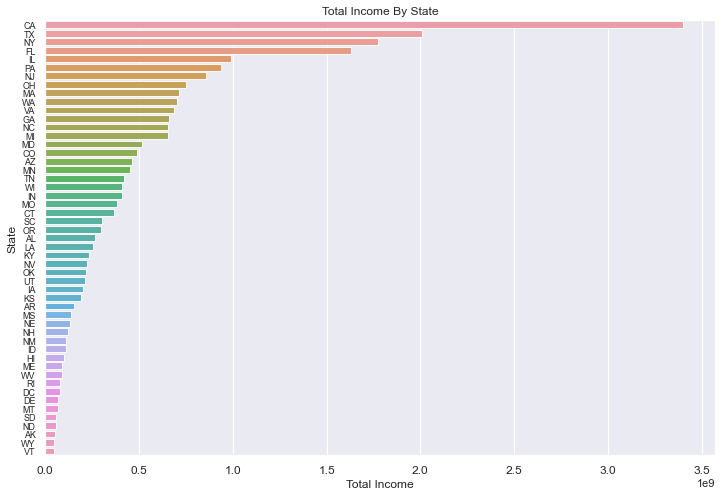

In [14]:
# plot total income by state
%matplotlib inline

# plot the data
plt.figure(figsize=(12,8))
sns.set(style='darkgrid')
sns.barplot(x=irs_sub.total_income, y=irs_sub.state, alpha=0.9)
plt.title('Total Income By State')
plt.xlabel('Total Income', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=9)
plt.show();

Now we can write the subset and aggregated data to a much more manageable file size.

In [15]:
filepath = "/Users/joshiden/Documents/Classes/CUNY SPS/Fall 2022/DATA 602/DATA-602/FINAL_PROJECT/irs_data_cleaned.csv"
irs_sub.to_csv(filepath, index=False)

### CDC COMMUNITY DATA

Finally, we read in the CDC community data.

In [16]:
# read in the CDC community levels data
com_file = 'https://raw.githubusercontent.com/josh1den/DATA-602/main/FINAL_PROJECT/SOURCE/United_States_COVID-19_Community_Levels_by_County.csv'
com_df = pd.read_csv(com_file)
com_df.head()

,county,county_fips,state,county_population,health_service_area_number,health_service_area,health_service_area_population,covid_inpatient_bed_utilization,covid_hospital_admissions_per_100k,covid_cases_per_100k,covid-19_community_level,date_updated
0,Lincoln County,55069,Wisconsin,27593.0,282,"Marathon (Wausau), WI - Wood, WI",291401.0,4.7,13.4,177.58,Medium,2022-08-18
1,Manitowoc County,55071,Wisconsin,78981.0,355,"Sheboygan (Sheboygan), WI - Manitowoc, WI",244410.0,3.4,9.8,169.66,Low,2022-08-18
2,Marathon County,55073,Wisconsin,135692.0,282,"Marathon (Wausau), WI - Wood, WI",291401.0,4.7,13.4,209.30,High,2022-08-18
3,Monroe County,55081,Wisconsin,46253.0,290,"La Crosse (La Crosse), WI - Monroe, WI",257027.0,3.9,15.6,216.20,High,2022-08-18
4,Portage County,55097,Wisconsin,70772.0,400,"Portage, WI",70772.0,5.9,7.1,217.60,Medium,2022-08-18


In [17]:
com_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112836 entries, 0 to 112835
Data columns (total 12 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   county                              112836 non-null  object 
 1   county_fips                         112836 non-null  int64  
 2   state                               112836 non-null  object 
 3   county_population                   112835 non-null  float64
 4   health_service_area_number          112836 non-null  int64  
 5   health_service_area                 112836 non-null  object 
 6   health_service_area_population      112829 non-null  float64
 7   covid_inpatient_bed_utilization     112648 non-null  float64
 8   covid_hospital_admissions_per_100k  112778 non-null  float64
 9   covid_cases_per_100k                112836 non-null  float64
 10  covid-19_community_level            112782 non-null  object 
 11  date_updated              

We can see the dataframe consists of 112,846 rows and 12 columns, containing county information for case and hospitalizations, with null values in hospital admissions, bed utilization, community level, and county population. Let's subset the data down to county, state, population, hospital admissions, and cases. 

In [18]:
# subset the desired columns
cols = ['county','state','county_population','covid_hospital_admissions_per_100k','covid_cases_per_100k']
com_df = com_df[cols]
com_df.head()

,county,state,county_population,covid_hospital_admissions_per_100k,covid_cases_per_100k
0,Lincoln County,Wisconsin,27593.0,13.4,177.58
1,Manitowoc County,Wisconsin,78981.0,9.8,169.66
2,Marathon County,Wisconsin,135692.0,13.4,209.30
3,Monroe County,Wisconsin,46253.0,15.6,216.20
4,Portage County,Wisconsin,70772.0,7.1,217.60


And strip the word "County" from the county column

In [19]:
# strip the word "County" from the county column
com_df['county'] = com_df['county'].str.replace(' County', '')
com_df.head()

,county,state,county_population,covid_hospital_admissions_per_100k,covid_cases_per_100k
0,Lincoln,Wisconsin,27593.0,13.4,177.58
1,Manitowoc,Wisconsin,78981.0,9.8,169.66
2,Marathon,Wisconsin,135692.0,13.4,209.30
3,Monroe,Wisconsin,46253.0,15.6,216.20
4,Portage,Wisconsin,70772.0,7.1,217.60


We see that the states are listed by their full names, whereas in the other dataframes, each state is listed by it's abbreviation, so let's go ahead and replace all the states with their abbreviations. To do this, we'll use a dictionary of state abbreviations, and map it to state column.

In [20]:
# convert state column to abbreviations - thank you (https://gist.github.com/rogerallen/1583593)
abbreviations = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR',
                 'California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE',
                 'Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL',
                 'Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA',
                 'Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI',
                 'Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT',
                 'Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ',
                 'New Mexico': 'NM','New York': 'NY','North Carolina': 'NC','North Dakota': 'ND',
                 'Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI',
                 'South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX',
                 'Utah': 'UT','Vermont': 'VT','Virginia': 'VA','Washington': 'WA','West Virginia': 'WV',
                 'Wisconsin': 'WI','Wyoming': 'WY','District of Columbia': 'DC','American Samoa': 'AS',
                 'Guam': 'GU','Northern Mariana Islands': 'MP','Puerto Rico': 'PR',
                 'United States Minor Outlying Islands': 'UM','U.S. Virgin Islands': 'VI'}

In [21]:
# map the abbreviations to the state column
com_df['state'] = com_df.state.map(abbreviations)
com_df.head()

,county,state,county_population,covid_hospital_admissions_per_100k,covid_cases_per_100k
0,Lincoln,WI,27593.0,13.4,177.58
1,Manitowoc,WI,78981.0,9.8,169.66
2,Marathon,WI,135692.0,13.4,209.30
3,Monroe,WI,46253.0,15.6,216.20
4,Portage,WI,70772.0,7.1,217.60


And we'll check that all states converted.

In [22]:
# check the states all converted
com_df.state.unique()

array(['WI', 'WY', 'PR', nan, 'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT',
       'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME',
       'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
       'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'AS', 'DE', 'DC', 'GU'],
      dtype=object)

Now let's check the NA's again.

In [23]:
# how many nans? 
com_df.isna().sum()

county                                 0
state                                 68
county_population                      1
covid_hospital_admissions_per_100k    58
covid_cases_per_100k                   0
dtype: int64

In [24]:
# view the counties with nans
com_df[com_df['state'].isna()].county.unique()

array(['United States Virgin Islands',
       'Commonwealth of the Northern Mariana Islands'], dtype=object)

We decide to drop these territories and focus on the United States and Puerto Rico.

In [25]:
# drop these territories
com_df.dropna(inplace=True)
com_df.state.isna().sum()

0

We rename the columns,   

In [26]:
# rename columns
colnames = {'county_population':'population','covid_hospital_admissions_per_100k':'hospital_100k', 'covid_cases_per_100k':'cases_100k'}
com_df.rename(colnames, axis=1, inplace=True)
com_df.head()

,county,state,population,hospital_100k,cases_100k
0,Lincoln,WI,27593.0,13.4,177.58
1,Manitowoc,WI,78981.0,9.8,169.66
2,Marathon,WI,135692.0,13.4,209.30
3,Monroe,WI,46253.0,15.6,216.20
4,Portage,WI,70772.0,7.1,217.60


And aggregate, first by county and state mean totals, then by the sum of the population and the mean of hospital and cases. 

In [27]:
# aggregate first by county and state mean totals, then sum population by state and mean hospital and cases
com_df = com_df.groupby(['county','state'])[['population','hospital_100k','cases_100k']].mean().reset_index()
com_df = com_df.groupby('state').agg(population=('population','sum'),
                                                  hospital_100k=('hospital_100k','mean'),
                                                  cases_100k=('cases_100k','mean')).reset_index()
com_df.population.sum()

332162269.0229167

Then we write the file for storage.

In [28]:
# write to file for storage
filepath = '/Users/joshiden/Documents/Classes/CUNY SPS/Fall 2022/DATA 602/DATA-602/FINAL_PROJECT/com_data_cleaned.csv'
com_df.to_csv(filepath, index=False)

### COMBININING THE DATASETS

Now we read in the cleaned individual datasets.

In [29]:
# read in clean provisional data from github, aggregate by state
pro_df = pd.read_csv('https://raw.githubusercontent.com/josh1den/DATA-602/main/FINAL_PROJECT/CLEANED/pro_data_cleaned.csv')
pro_df = pro_df.groupby('state')['total_deaths'].sum().reset_index()
pro_df.head()

,state,total_deaths
0,AK,1332.0
1,AL,20229.0
2,AR,11783.0
3,AZ,28353.0
4,CA,100927.0


In [30]:
# read in clean irs data from github
irs_df = pd.read_csv('https://raw.githubusercontent.com/josh1den/DATA-602/main/FINAL_PROJECT/CLEANED/irs_data_cleaned.csv')
irs_df.head()

,state,total_income
0,CA,3.399587e+09
1,TX,2.009629e+09
2,NY,1.773392e+09
3,FL,1.632665e+09
4,IL,9.923638e+08


In [31]:
# read in clean community data from github
com_df = pd.read_csv('https://raw.githubusercontent.com/josh1den/DATA-602/main/FINAL_PROJECT/CLEANED/com_data_cleaned.csv')
com_df.head()

,state,population,hospital_100k,cases_100k
0,AK,1.126956e+06,7.626073,304.769059
1,AL,4.903185e+06,7.755949,146.164482
2,AR,3.017804e+06,7.716385,129.786189
3,AS,5.250237e+04,13.650000,534.829333
4,AZ,7.278717e+06,8.377905,144.123714


And we can combine the datasets on the state column, which we'll store in the project repository. 

In [32]:
# combining the datasets
master_df = irs_df.merge(pro_df, on='state')
master_df = master_df.merge(com_df, how='left', on='state')
master_df.head()

,state,total_income,total_deaths,population,hospital_100k,cases_100k
0,CA,3.399587e+09,100927.0,39512223.0,7.858571,156.901271
1,TX,2.009629e+09,98883.0,28995881.0,6.498470,133.972121
2,NY,1.773392e+09,74666.0,19453561.0,10.102304,156.108995
3,FL,1.632665e+09,75799.0,21477737.0,12.335991,150.614136
4,IL,9.923638e+08,36124.0,12671821.0,7.805630,161.801387


In [33]:
# write master dataframe to file
filepath = '/Users/joshiden/Documents/Classes/CUNY SPS/Fall 2022/DATA 602/DATA-602/FINAL_PROJECT/master_data_cleaned.csv'
master_df.to_csv(filepath, index=False)

Now reading in the cleaned master data we view some summary statistics, and we can take a look at histograms of the columns.

In [34]:
# read master data
master_df = pd.read_csv('https://raw.githubusercontent.com/josh1den/DATA-602/main/FINAL_PROJECT/CLEANED/master_data_cleaned.csv')

In [35]:
# view summary statistics
master_df.describe()

,total_income,total_deaths,population,hospital_100k,cases_100k
count,5.100000e+01,51.000000,5.100000e+01,51.000000,51.000000
mean,4.774958e+08,20757.588235,6.446066e+06,7.866107,143.363021
std,6.031419e+08,23191.898306,7.353082e+06,1.677785,36.455433
min,4.574175e+07,755.000000,5.787590e+05,4.934719,83.310571
25%,1.120052e+08,5150.000000,1.789606e+06,6.836958,117.627670
50%,2.642595e+08,13932.000000,4.467673e+06,7.463016,134.534032
75%,6.539656e+08,26469.000000,7.446805e+06,8.516739,156.505133
max,3.399587e+09,100927.000000,3.951222e+07,12.463117,304.769059


Now we have one master dataset containing all of the desired data. Let's take a look at histograms of each column. 

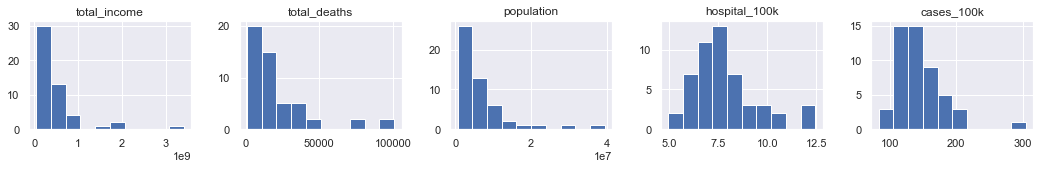

In [36]:
column_slice = master_df.iloc[:,1:]
fig, axis = plt.subplots(1,5,figsize=(18, 2))
column_slice.hist(ax=axis);

We can see the only columns close to a normal distribution are hospitalizations and cases, though both are right skewed. As our interest lies in the relationships, we can produce scatter plots to observe any linearity between the variables.

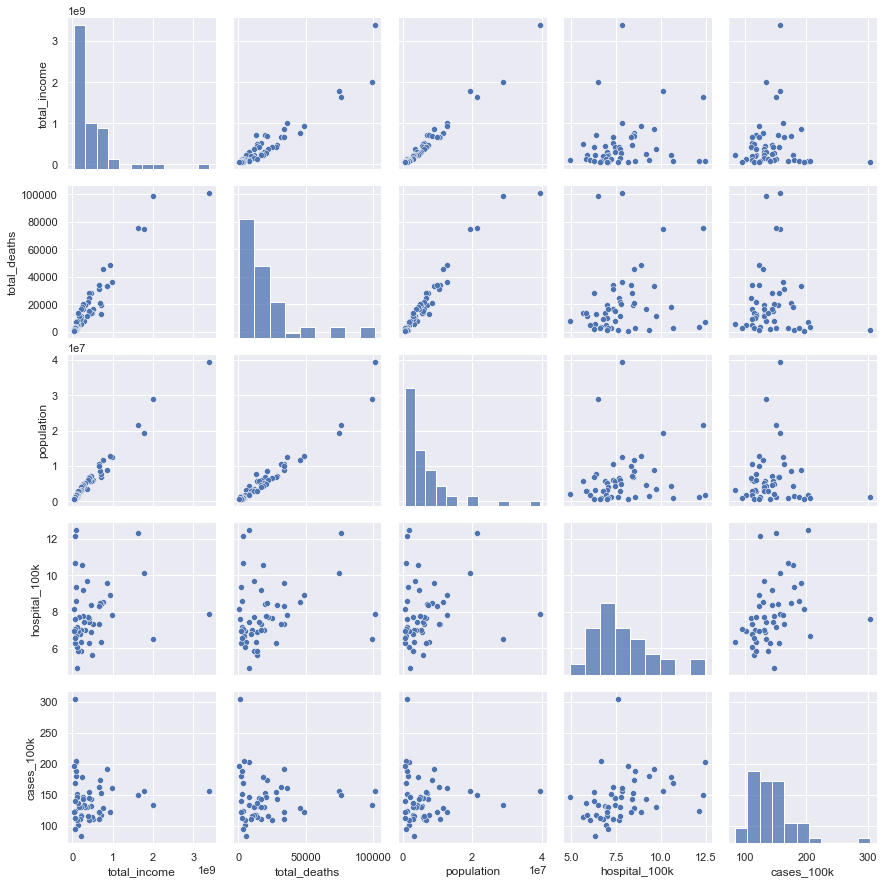

In [37]:
# pairs plot using seaborn
sns.pairplot(master_df);

We observe population appears to have a linear relationship with total income and total death, unsurprisingly -- the more people, the more money and the more fatalities. We also observe total income to have a relationship with total death. With this in mind, we transform these three categories to produce income_per_capita and death_rate columns.

In [38]:
# per capita income, death rate columns
master_df['income_per_capita'] = master_df['total_income']/ master_df['population'] * 1000
master_df['death_rate'] = master_df['total_deaths'] / master_df['population']
master_df.head()

,state,total_income,total_deaths,population,hospital_100k,cases_100k,income_per_capita,death_rate
0,CA,3.399587e+09,100927.0,39512223.0,7.858571,156.901271,86038.868683,0.002554
1,TX,2.009629e+09,98883.0,28995881.0,6.498470,133.972121,69307.405769,0.003410
2,NY,1.773392e+09,74666.0,19453561.0,10.102304,156.108995,91160.282794,0.003838
3,FL,1.632665e+09,75799.0,21477737.0,12.335991,150.614136,76016.626892,0.003529
4,IL,9.923638e+08,36124.0,12671821.0,7.805630,161.801387,78312.646629,0.002851


Now let's take a look at scatter plots with the transformed variables.

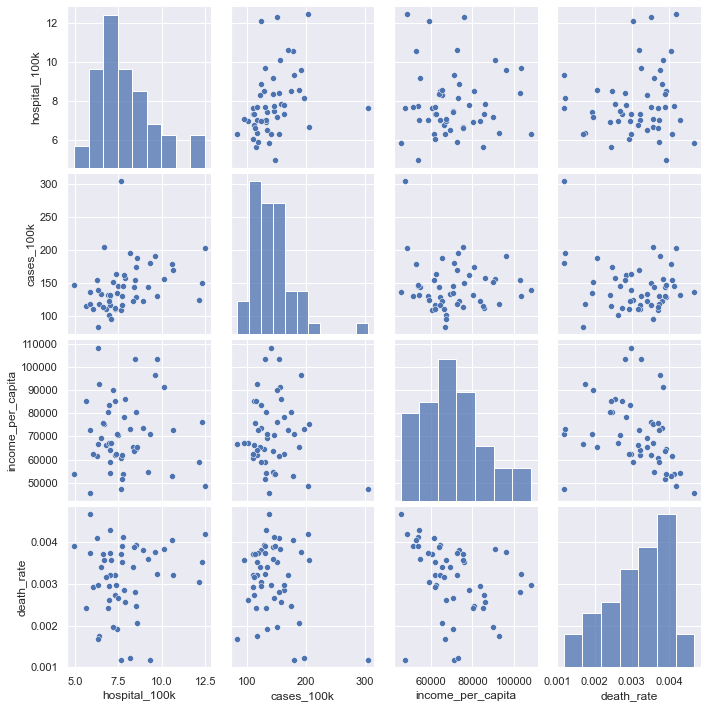

In [39]:
# pairs plot of rate columns
pairs_slice = master_df.iloc[:,4:]
sns.pairplot(pairs_slice);

We see amongst the new variables, the only noticeable relationship is between death rate and income per capita, so let's focus on those two variables and see if they satisfy the conditions for an ordinary least squares regression model.

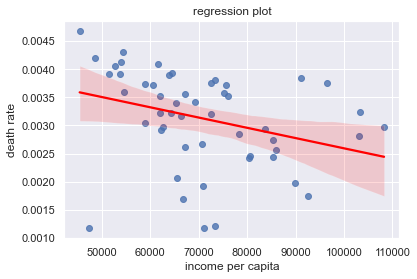

In [40]:
# plot the regression line
sns.regplot(x='income_per_capita', y='death_rate', data=master_df, line_kws={'color': 'red'})
plt.xlabel('income per capita')
plt.ylabel('death rate')
plt.title('regression plot')
plt.show();

We observe there is a modest linear relationship between variables with a substantial standard error as represented by the shadowed red in the plot. 

### REGRESSION MODEL

We can build a regression model for the data using the statsmodels package. We define the response and predictor variables and add a constant to the model. We then fit the model and print a summary. 

In [42]:
#define response variable
y = master_df['death_rate']

#define predictor variables
x = master_df['income_per_capita']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model_full = sm.OLS(y, x).fit()

#view model summary
print(model_full.summary())

                            OLS Regression Results                            
Dep. Variable:             death_rate   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     5.584
Date:                Sat, 10 Dec 2022   Prob (F-statistic):             0.0221
Time:                        15:08:31   Log-Likelihood:                 291.62
No. Observations:                  51   AIC:                            -579.2
Df Residuals:                      49   BIC:                            -575.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0044      0.00

We can see from the Durbin-Watson score that the variables are not auto-correlated, establishing independence. But we can also see by the R-squared value that the income per capita accounts for only 10% of the variance in death rate. We do observe that income per capita has a p-value below alpha 0.05, indicating it is significant towards death rate. Let's take a look at the residuals to see if they satisfy the conditions for ordinary least squares regression.

We can plot a histogram of the residuals, 

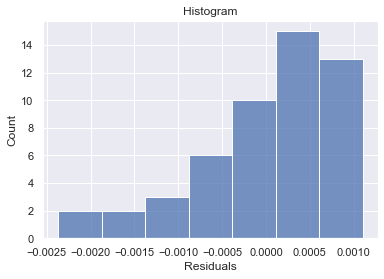

In [43]:
# generate histogram
sns.histplot(model_full.resid)
plt.xlabel('Residuals')
plt.title('Histogram');

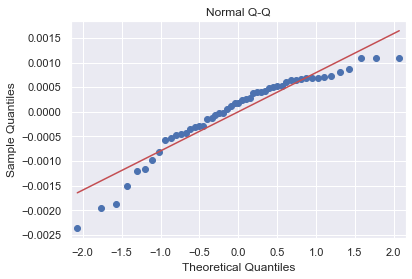

In [44]:
# generate Q-Q plot
res = model_full.resid # residuals
fig = sm.qqplot(res, line='s')
plt.title('Normal Q-Q')
plt.show()

We can see the residuals do not satisfy the condition of normality for simple linear regression. Let's see if there are any outliers.

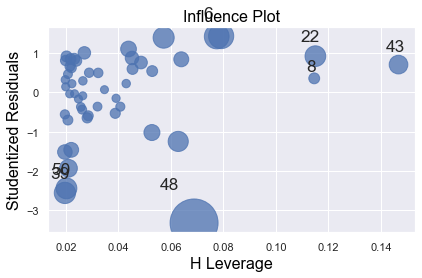

In [45]:
# residuals vs. leverage plot
fig = sm.graphics.influence_plot(model_full, criterion="cooks")
fig.tight_layout(pad=1.0)

We can see there are some influential cases affecting the model. This makes sense as we are aware of the presence of outliers from the scatterplot. 

eval_env: 1


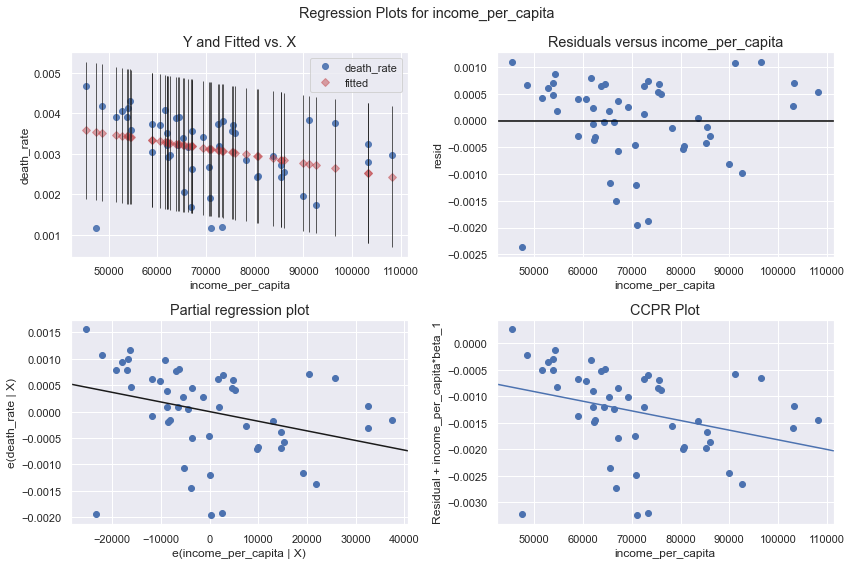

In [46]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model_full, 'income_per_capita', fig=fig);

We can see the residuals are not homoskedactic, meaning they are not spread equally along the range of predictors. We fail to reject the null hypothesis, and conclude the variables do not satisfy the conditions for simple linear regression. 

# CONCLUSION

In this project, we obtained, transformed, and analyzed three datasets containing covid and income information to determine if cases, hospitalizations, and deaths met the conditions for a simple linear regression model with income, using pandas, numpy, matplotlib, seaborn, and statsmodels packages in python. We observe that although there is a relationship between income per capita and death rates, they do not satisfy the conditions for simple linear regression. 
